In [107]:
from netCDF4 import Dataset
import wrf
import xarray as xr
import numpy as np
import glob
import cartopy.crs as crs
from cartopy.io.shapereader import Reader
import pandas as pd
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

%matplotlib inline

In [108]:
#wrfile_d02 = Dataset('/media/lucas/ce7c746b-5271-4ebe-a443-a00fe8fb43f4/wrf/WRF/run/wrfout_d02_2018-05-23_13:00:00')
geo = Dataset('/home/lucas/dados_vento/dominios/final/geo_em.d03.nc')
#geo = Dataset('/media/lucas/ce7c746b-5271-4ebe-a443-a00fe8fb43f4/wrf/WPS/geo_em.d03.nc')

In [114]:
geo.variables.values['HGT_M']

TypeError: 'builtin_function_or_method' object is not subscriptable

In [110]:
topo = wrf.getvar(geo, "HGT_M")
lat = wrf.getvar(geo, "lat")
lon = wrf.getvar(geo, "lon")

ValueError: conflicting sizes for dimension 'south_north': length 51 on the data but length 48 on coordinate 'XLONG_M'

In [111]:
# LER DADOS TORRES

da = pd.read_csv('/home/lucas/dados_vento/lat_lon_towers.txt',\
    usecols=[1,2])
lat = da.lat.values
lon = da.lon.values

In [105]:
t2 = wrf.getvar(wrfile_d02, 'P')[0]

NameError: name 'wrfile_d02' is not defined

In [112]:
lats, lons = wrf.latlon_coords(topo)

ValueError: 'var' object does not contain coordinate attributes

In [80]:
cart_proj = wrf.get_cartopy(topo)

In [81]:
data = Reader('/home/lucas/dados_vento/shapefile/Municipios_IBGE.shp')


Text(0.5, 1.0, 'GMTED2010 30-arc-second topography height\nNaT')

/home/lucas/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f84663e4a70> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


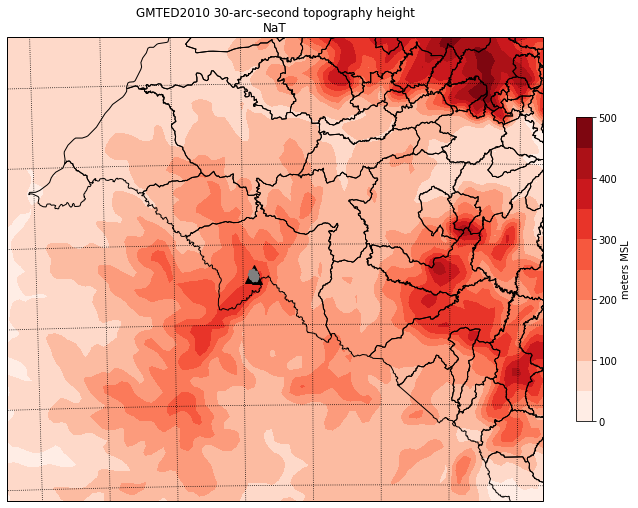

In [82]:
# Create a figure
fig = plt.figure(figsize=(12,9))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)
ax.add_geometries(data.geometries(), crs=crs.Geodetic(), edgecolor='k', facecolor='none')

# Add coastlines
ax.coastlines('50m', linewidth=0.8)
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', 
                                       '50m', linewidth=1.0, edgecolor='k', facecolor='none') )

# Plot contours
plt.contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(topo), 10, 
                transform=crs.PlateCarree(), cmap=get_cmap("Reds"))
# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.62)
cbar.set_label(topo.units)
ax.plot(lon[:3], lat[:3], 'g^',color='black', markersize=10,\
             transform=crs.Geodetic())
ax.plot(lon[3:], lat[3:],'.',color='gray', markersize=5,\
             transform=crs.Geodetic()) 
# Set the map limits.  Not really necessary, but used for demonstration.
ax.set_xlim(wrf.cartopy_xlim(topo))
ax.set_ylim(wrf.cartopy_ylim(topo))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title(topo.description+'\n'+str(topo.Time.values))

In [83]:
from cartopy.io.shapereader import Reader

data = Reader('/home/lucas/dados_vento/shapefile/Municipios_IBGE.shp')


In [35]:
u10 = wrf.getvar(wrfile_d02, 'U10')
v10 = wrf.getvar(wrfile_d02, 'V10')
wind = np.sqrt(u10*u10+v10*v10)

In [26]:
nx = wrfile_d02.dimensions['west_east'].size
ny = wrfile_d02.dimensions['south_north'].size
dt, dx, dy = wrfile_d02.DT, wrfile_d02.DX, wrfile_d02.DY
cen_lat, cen_lon = wrfile_d02.CEN_LAT, wrfile_d02.CEN_LON
truelat1, truelat2, STAND_LON = wrfile_d02.TRUELAT1, wrfile_d02.TRUELAT2, wrfile_d02.STAND_LON
pole_lat, pole_lon = wrfile_d02.POLE_LAT, wrfile_d02.POLE_LON

In [27]:
### Create earth-rotated Dataset
# https://wrf-python.readthedocs.io/en/latest/user_api/generated/wrf.uvmet.html
cone = 1 # ???
uv   = wrf.uvmet(u10, v10, u10.XLONG, u10.XLAT, 
                     cen_lon, cone, meta=True, units='m s-1')

In [47]:
t2[20]

<xarray.DataArray 'wspd_wdir' (south_north: 33, west_east: 48)>
array([[7.793704 , 7.8079143, 7.886972 , ..., 6.022261 , 5.9381275,
        5.875613 ],
       [7.695238 , 7.7149425, 7.816955 , ..., 6.005211 , 5.902591 ,
        5.8467236],
       [7.590301 , 7.6135697, 7.657876 , ..., 5.993825 , 5.924463 ,
        5.869988 ],
       ...,
       [5.7460594, 5.7915554, 5.8337564, ..., 5.562491 , 5.5645194,
        5.52517  ],
       [5.6895614, 5.703197 , 5.7758493, ..., 5.582174 , 5.6030912,
        5.558615 ],
       [5.605179 , 5.596153 , 5.6433525, ..., 5.5781474, 5.5641603,
        5.522026 ]], dtype=float32)
Coordinates:
    wspd_wdir  <U4 'wspd'
    XLONG      (south_north, west_east) float32 -56.478973 ... -55.002808
    XLAT       (south_north, west_east) float32 -31.292412 ... -30.427338
    XTIME      float32 1140.0
    Time       datetime64[ns] 2018-05-23T13:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  wspd,wdir in projection space
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-55.87900161743164, moad_cen_lat...

/home/lucas/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f6e98107b90> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


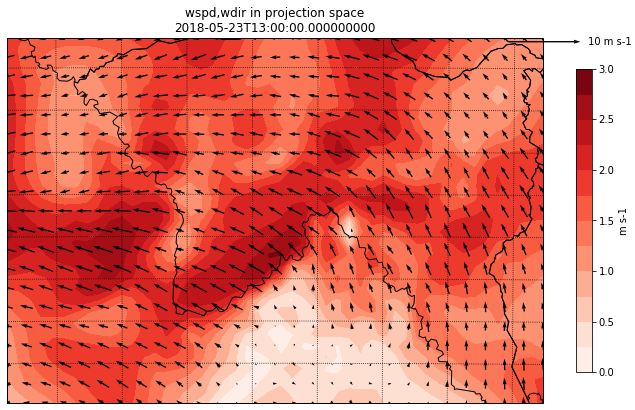

In [50]:
fig = plt.figure(figsize=(12,9))
# Set the GeoAxes to the projection used by WRF
cart_proj = wrf.get_cartopy(t2)
ax = plt.axes(projection=cart_proj)
ax.add_geometries(data.geometries(), crs=crs.Geodetic(), edgecolor='k', facecolor='none')
# Add coastlines
ax.coastlines('50m', linewidth=0.8)
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '50m', 
                                           linewidth=1.0, edgecolor='k', facecolor='none'))
extent = [-56,-54,-31,-30]
ax.set_extent(extent, crs = crs.PlateCarree())
# Plot the wind speed as a contour plot
plt.contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(t2[0]), 10, 
                transform=crs.PlateCarree(), cmap=get_cmap("Reds"))

# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.62)
cbar.set_label(t2.units)

# Set the map limits.  Not really necessary, but used for demonstration.
ax.set_xlim(wrf.cartopy_xlim(t2))
ax.set_ylim(wrf.cartopy_ylim(t2))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title(t2.description+'\n'+str(t2.Time.values))

# Add arrows to show the wind vectors !!!!
x = u10.XLONG.values
y = u10.XLAT.values
u = uv[0].values
v = uv[1].values


Q = plt.quiver( x, y, u, v, 
               pivot='middle', 
               transform=crs.PlateCarree(), 
               regrid_shape=20 
               )

### plot quiver key
qk = plt.quiverkey(Q, 
                   1.07, 0.99,                  # x,y label position
                   10, str(10)+' '+u10.units, # choose units + update string
                   labelpos='E',                # add label to the right
                   coordinates='axes'
                   )

In [148]:
wspeed = wrf.getvar(wrfiles,'wspd_wdir')[0]

In [155]:
wspeed.shape

(64, 108, 111)

In [158]:
wrf.interplevel(wspeed,'z')

TypeError: missing a required argument: 'desiredlev'